<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Web Scraping Analytics</font>
### <font color='blue'>Parte 2 - Analytics</font>

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
!pip install -q wordcloud

In [3]:
# Imports
import PIL
import random
import wordcloud
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from wordcloud import WordCloud
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.26.4
seaborn   : 0.12.2
wordcloud : 1.9.3
pandas    : 2.2.2
PIL       : 10.4.0
plotly    : 5.9.0
matplotlib: 3.7.2



## Carregando os Dados Extraídos via Web Scraping

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [6]:
# Shape
df_dsa.shape

(100, 6)

In [7]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          100 non-null    object 
 1   descricao       100 non-null    object 
 2   ano_lancamento  100 non-null    int64  
 3   duracao         100 non-null    object 
 4   avaliacao       100 non-null    float64
 5   votos           100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
# Primeiros registros
df_dsa.head()

titulo  \
0                       1. The Shawshank Redemption   
1                                  2. The Godfather   
2                                3. The Dark Knight   
3  4. The Lord of the Rings: The Return of the King   
4                               5. Schindler's List   

                                           descricao  ano_lancamento duracao  \
0  A banker convicted of uxoricide forms a friend...            1994  2h 22m   
1  The aging patriarch of an organized crime dyna...            1972  2h 55m   
2  When a menace known as the Joker wreaks havoc ...            2008  2h 32m   
3  Gandalf and Aragorn lead the World of Men agai...            2003  3h 21m   
4  In German-occupied Poland during World War II,...            1993  3h 15m   

   avaliacao votos  
0        9.3  2.9M  
1        9.2    2M  
2        9.0  2.9M  
3        9.0    2M  
4        9.0  1.5M

## Limpeza dos Dados Para Análise

In [9]:
# Visualiza primeiras linhas de uma das colunas
df_dsa['titulo'].head()

0                         1. The Shawshank Redemption
1                                    2. The Godfather
2                                  3. The Dark Knight
3    4. The Lord of the Rings: The Return of the King
4                                 5. Schindler's List
Name: titulo, dtype: object

In [10]:
# Divide a string da coluna 'titulo' em duas partes, separando pelo primeiro espaço
novo = df_dsa['titulo'].str.split(" ", n = 1, expand = True)

In [11]:
# Visualiza primeiras linhas
novo.head()

0                                              1
0  1.                       The Shawshank Redemption
1  2.                                  The Godfather
2  3.                                The Dark Knight
3  4.  The Lord of the Rings: The Return of the King
4  5.                               Schindler's List

In [12]:
# Adiciona o título extraído de volta ao dataframe
df_dsa['titulo'] = novo[1]

In [13]:
# Visualiza primeiras linhas
df_dsa['titulo'].head()

0                         The Shawshank Redemption
1                                    The Godfather
2                                  The Dark Knight
3    The Lord of the Rings: The Return of the King
4                                 Schindler's List
Name: titulo, dtype: object

In [14]:
# Nomes das colunas
df_dsa.columns

Index(['titulo', 'descricao', 'ano_lancamento', 'duracao', 'avaliacao',
       'votos'],
      dtype='object')

In [15]:
# Visualiza primeiras linhas
df_dsa['duracao'].head()

0    2h 22m
1    2h 55m
2    2h 32m
3    3h 21m
4    3h 15m
Name: duracao, dtype: object

In [16]:
# Função para converter o tempo no formato 'xh ym' para minutos
def dsa_converte_hora(time):
    
    # Divide a string 'time' em uma lista de partes, separadas por espaços
    time = time.split(' ')
    
    # Extrai a parte da hora (antes do 'h') e converte para um número inteiro
    hour = int(time[0].split('h')[0].strip())
    
    # Verifica se existe uma parte de minutos na lista de tempo
    if len(time) == 2:
        
        # Extrai a parte dos minutos (antes do 'm') e converte para um número inteiro
        minute = int(time[1].split('m')[0].strip())
        
        # Retorna o tempo total em minutos (hora em minutos + minutos)
        return hour * 60 + minute
    
    else:
        
        # Se não houver minutos, retorna apenas o tempo em horas convertido para minutos
        return hour * 60

In [17]:
# Aplica a função
df_dsa['duracao'] = df_dsa['duracao'].apply(dsa_converte_hora)

In [18]:
# Visualiza primeiras linhas
df_dsa['duracao'].head()

0    142
1    175
2    152
3    201
4    195
Name: duracao, dtype: int64

In [19]:
# Nomes das colunas
df_dsa.columns

Index(['titulo', 'descricao', 'ano_lancamento', 'duracao', 'avaliacao',
       'votos'],
      dtype='object')

In [20]:
# Visualiza primeiras linhas
df_dsa['votos'].head()

0    2.9M
1      2M
2    2.9M
3      2M
4    1.5M
Name: votos, dtype: object

In [21]:
# Função para converter a unidade dos votos de milhões (M) ou milhares (K) para um número em milhares
def dsa_converte_unidade(votes):
    
    # Verifica se o número de votos contém a letra 'M' (milhões)
    if 'M' in votes:
        
        # Remove a letra 'M', converte para float e multiplica por 1000 para obter o valor em milhares
        return float(votes.replace('M', '')) * 1000
    
    else:
        
        # Caso contrário, remove a letra 'K' (milhares) e converte diretamente para float
        return float(votes.replace('K', ''))

In [22]:
# Aplica a função
df_dsa['votos(K)'] = df_dsa['votos'].apply(dsa_converte_unidade)

In [23]:
# Não precisamos mais da coluna original
df_dsa.drop(columns = ['votos'], inplace = True)

In [24]:
# Visualiza primeiras linhas
df_dsa.head()

titulo  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3  The Lord of the Rings: The Return of the King   
4                               Schindler's List   

                                           descricao  ano_lancamento  duracao  \
0  A banker convicted of uxoricide forms a friend...            1994      142   
1  The aging patriarch of an organized crime dyna...            1972      175   
2  When a menace known as the Joker wreaks havoc ...            2008      152   
3  Gandalf and Aragorn lead the World of Men agai...            2003      201   
4  In German-occupied Poland during World War II,...            1993      195   

   avaliacao  votos(K)  
0        9.3    2900.0  
1        9.2    2000.0  
2        9.0    2900.0  
3        9.0    2000.0  
4        9.0    1500.0

In [25]:
# Verifica se há valores ausentes
df_dsa.isna().sum()

titulo            0
descricao         0
ano_lancamento    0
duracao           0
avaliacao         0
votos(K)          0
dtype: int64

In [26]:
# Verifica se há linhas duplicadas
df_dsa.duplicated().sum()

0

## Web Scraping Analytics

- 1- Quantos Filmes Foram Lançados a Cada Ano?
- 2- Qual Década Teve o Maior Número de Lançamentos de Filmes?
- 3- Demonstre com Gráfico de Bolhas a Relação Entre Avaliação e Duração, Com Número de Votos.
- 4- Qual a Força da Correlação Entre Duração do Filme e o Número de Votos? 
- 5- Crie Uma Nuvem de Palavras Mostrando as Palavras Mais Frequentes na Descrição dos Filmes.

In [27]:
# Visualiza primeiras linhas
df_dsa.head()

titulo  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3  The Lord of the Rings: The Return of the King   
4                               Schindler's List   

                                           descricao  ano_lancamento  duracao  \
0  A banker convicted of uxoricide forms a friend...            1994      142   
1  The aging patriarch of an organized crime dyna...            1972      175   
2  When a menace known as the Joker wreaks havoc ...            2008      152   
3  Gandalf and Aragorn lead the World of Men agai...            2003      201   
4  In German-occupied Poland during World War II,...            1993      195   

   avaliacao  votos(K)  
0        9.3    2900.0  
1        9.2    2000.0  
2        9.0    2900.0  
3        9.0    2000.0  
4        9.0    1500.0

### 1- Quantos Filmes Foram Lançados a Cada Ano?

In [28]:
# Contagem de filmes por ano
filmes_por_ano = df_dsa['ano_lancamento'].value_counts().sort_index()

In [29]:
# Cria um DataFrame auxiliar
df_filmes_por_ano = filmes_por_ano.reset_index()
df_filmes_por_ano.columns = ['Ano', 'Número de Filmes']

In [30]:
# Gráfico interativo
fig = px.bar(df_filmes_por_ano, x = 'Ano', y = 'Número de Filmes', title = 'Número de Filmes Lançados Por Ano')
fig.update_layout(xaxis_tickangle = -45)
fig.show()

### 2- Qual Década Teve o Maior Número de Lançamentos de Filmes?

In [31]:
# Visualiza primeiras linhas
df_dsa.head()

titulo  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3  The Lord of the Rings: The Return of the King   
4                               Schindler's List   

                                           descricao  ano_lancamento  duracao  \
0  A banker convicted of uxoricide forms a friend...            1994      142   
1  The aging patriarch of an organized crime dyna...            1972      175   
2  When a menace known as the Joker wreaks havoc ...            2008      152   
3  Gandalf and Aragorn lead the World of Men agai...            2003      201   
4  In German-occupied Poland during World War II,...            1993      195   

   avaliacao  votos(K)  
0        9.3    2900.0  
1        9.2    2000.0  
2        9.0    2900.0  
3        9.0    2000.0  
4        9.0    1500.0

In [32]:
# Crie nova coluna com range de décadas
df_dsa['decada_lancamento'] = df_dsa['ano_lancamento'] // 10 * 10

In [33]:
# Visualiza primeiras linhas
df_dsa.head()

titulo  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3  The Lord of the Rings: The Return of the King   
4                               Schindler's List   

                                           descricao  ano_lancamento  duracao  \
0  A banker convicted of uxoricide forms a friend...            1994      142   
1  The aging patriarch of an organized crime dyna...            1972      175   
2  When a menace known as the Joker wreaks havoc ...            2008      152   
3  Gandalf and Aragorn lead the World of Men agai...            2003      201   
4  In German-occupied Poland during World War II,...            1993      195   

   avaliacao  votos(K)  decada_lancamento  
0        9.3    2900.0               1990  
1        9.2    2000.0               1970  
2        9.0    2900.0               2000  
3        9.0    2000.0               2000  
4        9.0    1500.0               1990

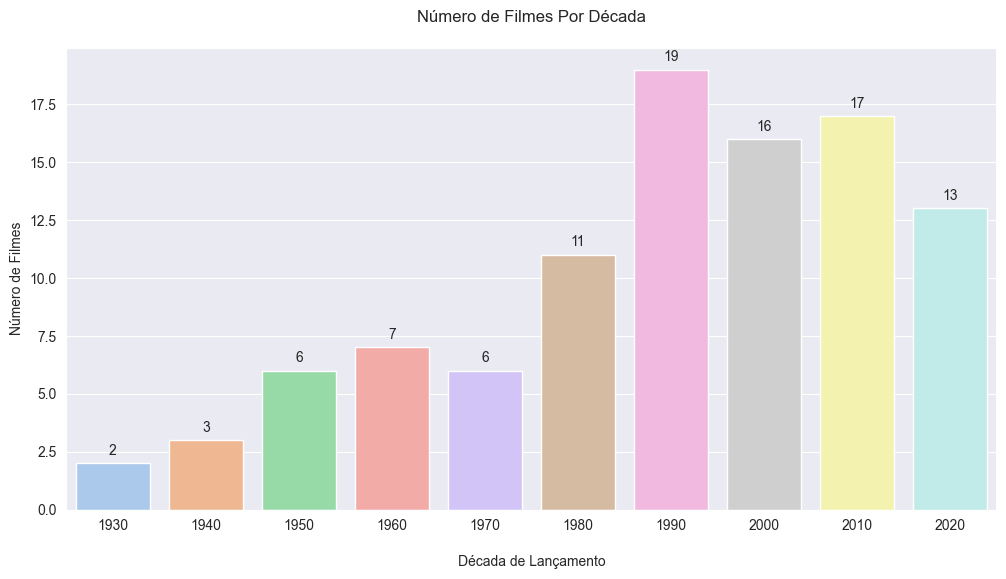

In [34]:
# Plot

# Definindo o estilo darkgrid
sns.set_style("darkgrid")

# Tamanho da figura
plt.figure(figsize = (12, 6))

# Barplot
ax = sns.barplot(x = 'decada_lancamento', 
                 y = 'avaliacao', 
                 data = df_dsa, 
                 palette = 'pastel', 
                 estimator = lambda x: len(x))

# Adicionar anotações nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Títulos e rótulos
plt.title('Número de Filmes Por Década\n')
plt.xlabel('\nDécada de Lançamento')
plt.ylabel('Número de Filmes')
plt.show()

### 3- Demonstre com Gráfico de Bolhas a Relação Entre Avaliação e Duração, Com Número de Votos.

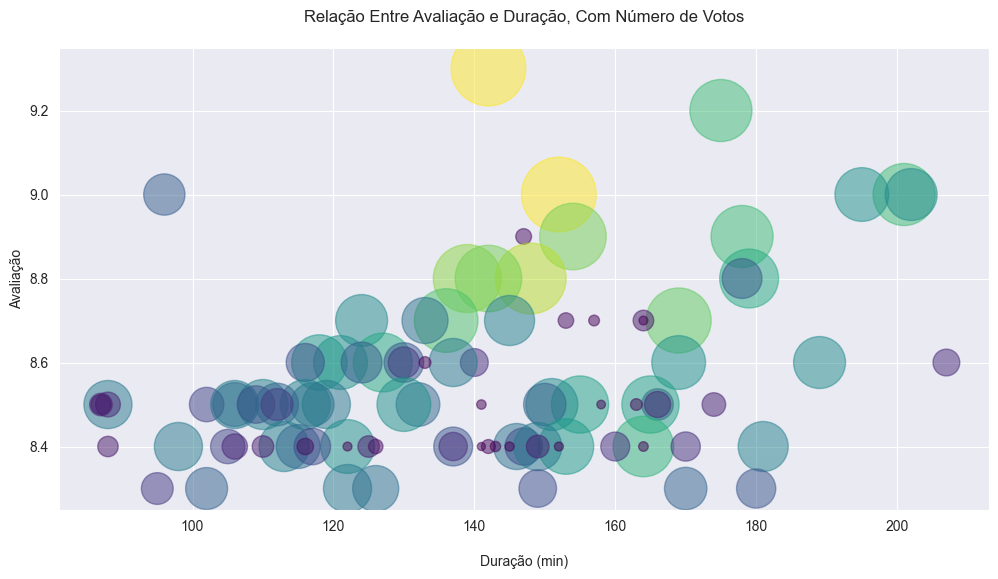

In [35]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(df_dsa['duracao'], 
            df_dsa['avaliacao'], 
            s = df_dsa['votos(K)'], 
            alpha = 0.5, 
            c = df_dsa['votos(K)'], 
            cmap = 'viridis')
plt.title('Relação Entre Avaliação e Duração, Com Número de Votos\n')
plt.xlabel('\nDuração (min)')
plt.ylabel('Avaliação')
plt.show()

O parâmetro s define o tamanho de cada ponto no gráfico de dispersão. Em nosso caso estamos definindo o tamanho dos pontos de acordo com os valores na coluna df_dsa['votos(K)']. Isso significa que o tamanho de cada ponto será proporcional ao número de votos que cada filme (ou outra unidade de observação) recebeu. Em outras palavras, filmes com mais votos terão pontos maiores e filmes com menos votos terão pontos menores.

O parâmetro alpha controla a transparência dos pontos no gráfico. O valor pode variar de 0 a 1:

- alpha=1 significa que os pontos serão completamente opacos.
- alpha=0.5 significa que os pontos terão 50% de opacidade, ou seja, serão parcialmente transparentes.
- alpha=0 deixaria os pontos completamente invisíveis.

Um colormap é uma paleta de cores que mapeia valores numéricos para cores específicas. Em nosso caso, o parâmetro c define quais valores serão usados para colorir os pontos e o colormap (cmap) determina como essas cores são escolhidas com base nesses valores.

### 4- Qual a Força da Correlação Entre Duração do Filme e o Número de Votos? 

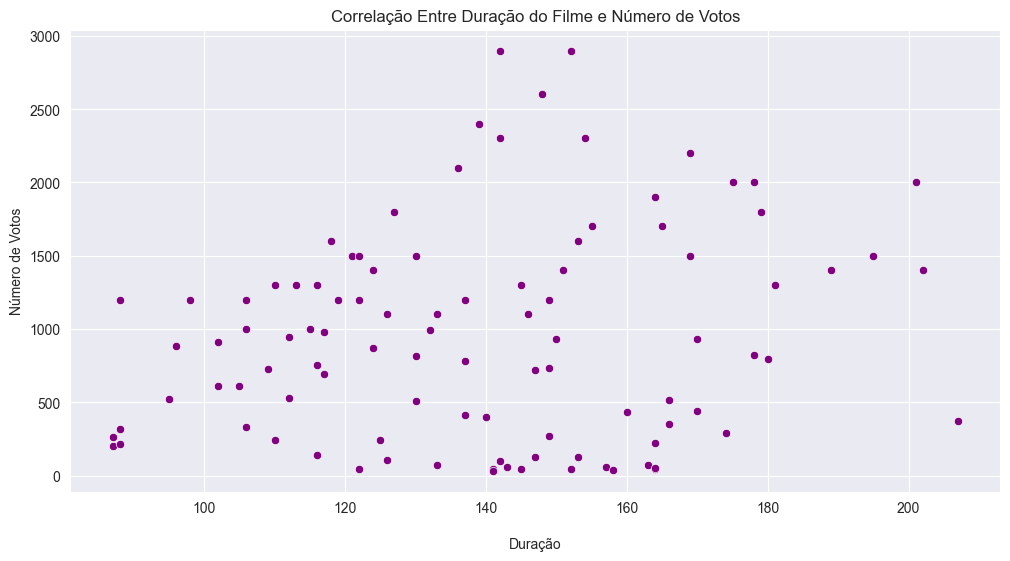

In [36]:
# Plot
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df_dsa, x = 'duracao', y = 'votos(K)', c = 'purple')
plt.title('Correlação Entre Duração do Filme e Número de Votos')
plt.xlabel('\nDuração')
plt.ylabel('Número de Votos')
plt.show()

In [37]:
# Cálculo do coeficiente de correlação entre as variáveis 'duracao' e 'votos(K)'
correlacao = df_dsa['duracao'].corr(df_dsa['votos(K)'])

In [38]:
# Exibe o valor da correlação
print(f'Coeficiente de Correlação entre Duração e Número de Votos: {correlacao}')

Coeficiente de Correlação entre Duração e Número de Votos: 0.1830993554343053


O coeficiente de correlação mede a força e a direção de uma relação linear entre duas variáveis. Ele resulta em um valor numérico entre -1 e 1:

- 1: Indica uma correlação perfeita positiva, ou seja, à medida que uma variável aumenta, a outra também aumenta de forma proporcional.
- 0: Indica nenhuma correlação linear, ou seja, as variáveis não têm uma relação linear direta.
- -1: Indica uma correlação perfeita negativa, ou seja, à medida que uma variável aumenta, a outra diminui de forma proporcional.

### 5- Crie Uma Nuvem de Palavras Mostrando as Palavras Mais Frequentes na Descrição dos Filmes.

In [39]:
# Visualiza primeiras linhas
df_dsa.head()

titulo  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3  The Lord of the Rings: The Return of the King   
4                               Schindler's List   

                                           descricao  ano_lancamento  duracao  \
0  A banker convicted of uxoricide forms a friend...            1994      142   
1  The aging patriarch of an organized crime dyna...            1972      175   
2  When a menace known as the Joker wreaks havoc ...            2008      152   
3  Gandalf and Aragorn lead the World of Men agai...            2003      201   
4  In German-occupied Poland during World War II,...            1993      195   

   avaliacao  votos(K)  decada_lancamento  
0        9.3    2900.0               1990  
1        9.2    2000.0               1970  
2        9.0    2900.0               2000  
3        9.0    2000.0               2000  
4        9.0    1500.0               1990

In [40]:
# Une os textos de todas as descrições
texto = ' '.join(df_dsa['descricao'])

In [41]:
texto

'A banker convicted of uxoricide forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple compassion. The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son. When a menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman, James Gordon and Harvey Dent must work together to put an end to the madness. Gandalf and Aragorn lead the World of Men against Sauron\'s army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring. In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis. The jury in a New York City murder trial is frustrated by a single member whose skeptical caution forces them to more carefully consider the evidence before jumping to a hasty verdict. The early life an

In [42]:
# Usamos uma imagem como máscara para desenha a word cloud
mascara = np.array(Image.open("stormtrooper_mask.png"))

Referência: https://github.com/amueller/word_cloud

In [43]:
# Cria a nuvem de palavras
wc = WordCloud(max_words = 1000, mask = mascara, margin = 8, random_state = 1).generate(texto)

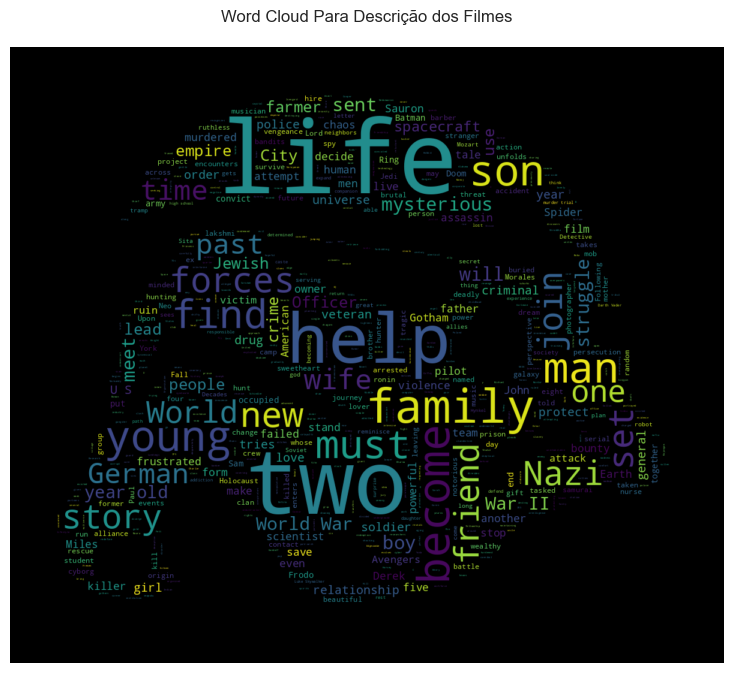

In [44]:
# Plot
plt.figure(figsize = (14, 8))
array_imagem = wc.to_array()
plt.title("Word Cloud Para Descrição dos Filmes\n")
plt.imshow(array_imagem, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [45]:
# Salva em disco
wc.to_file("a_new_hope.png")

Se quiser algo mais tradicional...

In [46]:
# Cria a nuvem de palavras
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(texto)

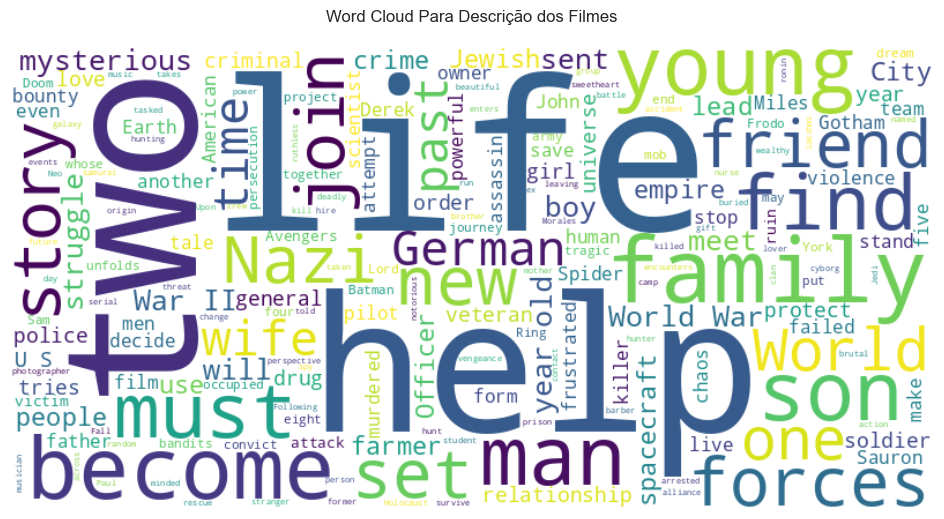

In [47]:
# Plot da nuvem de palavras
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud Para Descrição dos Filmes\n')
plt.show()

In [48]:
# Salva em disco
wordcloud.to_file("wordcloud.png")

In [49]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



# Fim